# **Prediksi Pembelian Asuransi Perjalanan Berdasarkan Demografi dan Perilaku Pelanggan**
---
---

## 📖 **Library Import**

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline
# Selalu pakai ketika ingin pakai pipeline tetapi ada step balancing data
from imblearn.pipeline import Pipeline

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# XGBoost
from xgboost.sklearn import XGBClassifier

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Model Interpretation
import shap
import lime

## 🔄️ **Workflow in CRISP-DM**

## **1. Business Understanding**

### 📕 **Introduction**
Perusahaan penyedia layanan jasa asuransi menghadapi tantangan untuk meningkatkan customer yang mengadopsi auransi perjalanan sebagai perlindungan. Banyaknya masyarakat yang melakukan perjalanan tidak melakukan pembelian auransi untuk melindungi dirinya. Hal ini dapat disebabkan oleh banyak faktor seperti kurangnya kesadaran akan pentingnya perlindungan diri hingga tidak adanya kesesuaian penawaran dan kebutuhan yang dicari oleh calon pembeli asuransi. Untuk dapat memprediksi apakah seseorang akan membeli asuransi perjalanan atau tidak, dapat digunakan algoritma *Machine Learning*. Perusahaan akan dapat memprediksi kecenderungan calon pembeli asuransi berdasarkan data-data yang dimiliki. Pendekatan ML dapat membantu perusahaan untuk mengarahkan promosi yang efektif, melakukan efisiensi pemasaran, serta meningkatkan secara signifikan pembeli dan pengguna asuransi perjalanan.

**Stake Holder :**
- **Perusahaan Penyedia Layanan Auransi Divisi Marketing, Sales, Product Development, dan Risk Management**

### 😩 **Problem Framing**
- Perusahaan ingin memprediksi apakah seseorang diprediksi akan menggunakan layanan asuransi perjalanan,
- Target:
    + Kelas `1` : Membeli Auransi --> Kelas Positif
    + Kelas `0` : Tidak membeli asuransi --> Kelas Negatif
- Business Metrics:
    + FN
        - Model memprediksi seseorang tidak membeli asuransi, namun aktualnya membeli asuransi.
        - Resikonya, perusahaan kehilangan calon pelanggan karena tidak memberikan promosi kepada calon pelanggan yang berminat.
    + FP
        - Model memprediksi seseorang membeli asuransi, namun aktualnya tidak membeli asuransi.
        - Resikonya, biaya operasional meningkat karena sumberdaya promosi (email, iklan, telepon, dll) terbuang sia-sia pada calon pelanggan yang tidak berminat.

    + **Business metrics** yang akan digunakan adalah **F1 Score**. F1 score fokus pada menyeimbangkan FN dan FP dimana keduanya dianggap sama-sama penting untuk ditekan jumlahnya karena resiko keduanya sama besar.

### 🚀 **Objectives**
- Membangun model ML yang mampu memprediksi kemungkinan pelanggan akan membeli asuransi atau tidak akan membeli asuransi.
- Membangun model ML yang memiliki F1 yang tinggi.
- Membangun model ML yang mampu diinterpretasikan.

## **2. Data Understanding**
| Kolom               | Deskripsi                                                                                  |
|---------------------|---------------------------------------------------------------------------------------------|
| Age                 | Usia pelanggan                                                                             |
| Employment Type     | Jenis pekerjaan pelanggan                           |
| GraduateOrNot       | Status pendidikan pelanggan                                      |
| AnnualIncome        | Pendapatan tahunan pelanggan dalam INR (dibulatkan ke kelipatan 50.000).                   |
| FamilyMembers       | Jumlah anggota keluarga pelanggan.                                                         |
| ChronicDiseases     | Apakah pelanggan memiliki penyakit kronis (1 = Ya, 0 = Tidak).                             |
| FrequentFlyer       | Apakah pelanggan merupakan pelancong yang sering terbang (1 = Ya, 0 = Tidak).              |
| EverTravelledAbroad | Apakah pelanggan pernah bepergian ke luar negeri (1 = Ya, 0 = Tidak).                       |
| TravelInsurance     | Target: Apakah pelanggan membeli asuransi perjalanan (1 = Ya, 0 = Tidak).                  |


### **Load Dataset**

In [ ]:
df = pd.read_csv('Data/TravelInsurancePrediction.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### **Data Cleansing**

In [3]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [7]:
df.duplicated().sum()

738

> Data duplikat tidak dihilangkan sebab tidak ada informasi pendukung terkait identitas orang dalam dataset. Bisa jadi merupakan orang yang berbeda dengan informasi yang sama.

### **Exploratory Data Analysis (EDA)**

#### **Bagaimana Proporsi Membeli Asuransi dan Tidak Membeli Perjalanan?**

In [8]:
df['TravelInsurance'].value_counts(normalize=True)

TravelInsurance
0    0.642677
1    0.357323
Name: proportion, dtype: float64

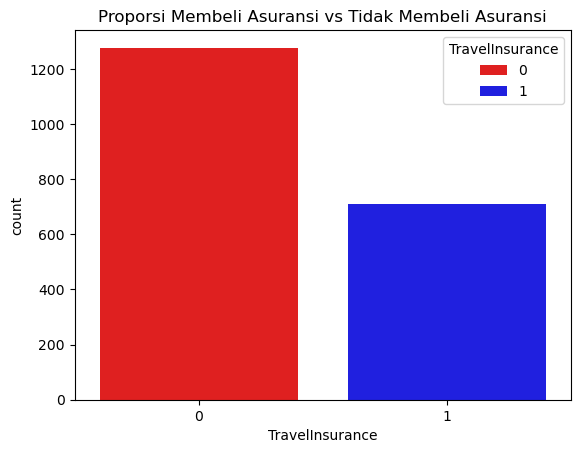

In [10]:
plt.title('Proporsi Membeli Asuransi vs Tidak Membeli Asuransi');
sns.countplot(data=df, x='TravelInsurance', hue='TravelInsurance', palette=['Red', 'Blue']);

> Sebanyak 64% orang dalam dataset tidak membeli asuransi perjalanan sedangkan 36% sisanya membeli asuransi perjalanan. Terindikasi adanya imbalance data antara kelas 0 dan kelas 1.

#### **Bagaimana Korelasi Antar Fitur?**

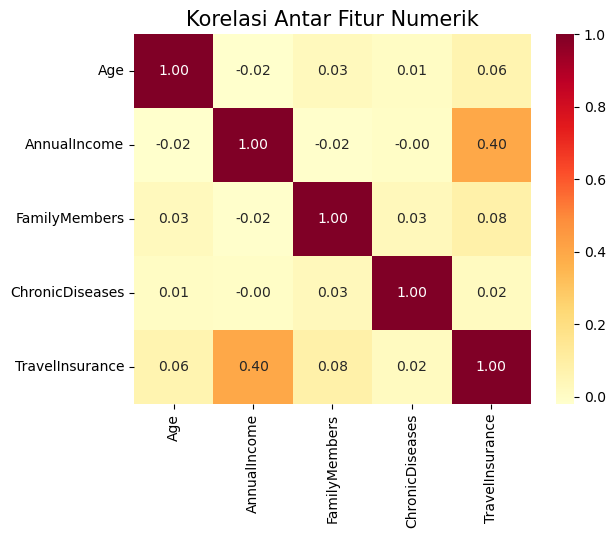

In [16]:
plt.title('Korelasi Antar Fitur Numerik', fontsize=15);
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrRd', fmt='.2f');

> AnnualIncome memiliki hubungan positif dan paling kuat dengan TravelInsurance, dimana semakin tinggi AnnualIncome maka akan meningkatkan potensi seseorang membeli asuransi perjalanan.

#### **Bagaimana Distribusi AnnualIncome?**

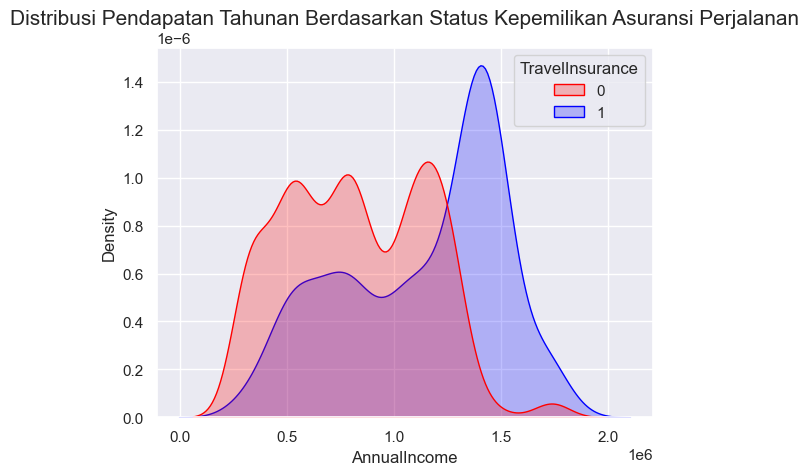

In [23]:
plt.title('Distribusi Pendapatan Tahunan Berdasarkan Status Kepemilikan Asuransi Perjalanan', size=15);
sns.kdeplot(data=df, x='AnnualIncome', hue='TravelInsurance', fill=True, common_norm=False, palette=['Red', 'Blue']);

> Pembeli Asuransi (Kelas 1) cenderung memiliki pendapatan yang lebih tinggi dibandingkan orang-orang yang tidak membeli asuransi.

#### **Bagaimana Perbedaan Jumlah Membeli vs Tidak Membeli Asuransi pada Setiap Kolom Kategorik?**

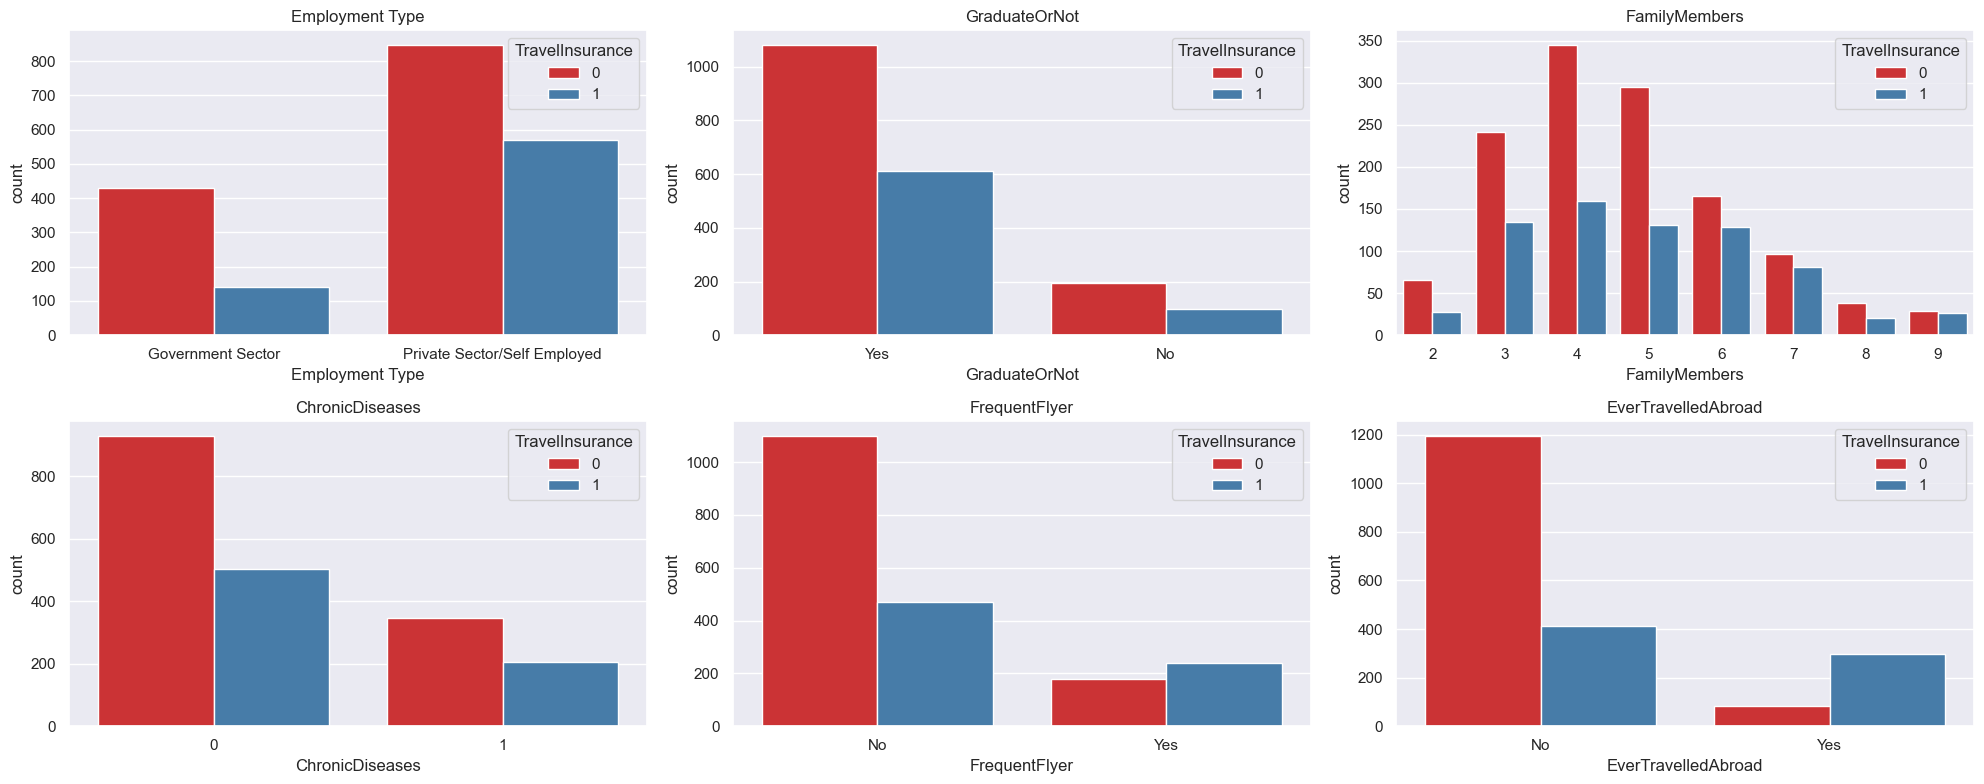

In [19]:
features = ['Employment Type', 'GraduateOrNot', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
plt.figure(figsize=(20, 8))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(2, 3, plotnumber)
    sns.countplot(data=df, x=feature, hue='TravelInsurance')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

> - Employment Type
>   + Proporsi pembeli asuransi lebih besar pada kalangan Private Sector/SelfEmployed dibandingkan pada Government Sector.

> - GraduateOrNot
>   + Proporsi pembeli asuransi lebih banyak pada orang-orang yang bukan lulusan sarjana dibandingkan orang-orang yang sarjana.

> - FamilyMembers
>   + Semakin banyak anggota keluarga, cenderung lebih sedikit membeli asuransi perjalanan. 

> - ChronicDiseases
>   + Pembelian asuransi lebih tinggi jumlahnya pada kategori tidak memiliki penyakit kronis.

> - FrequentFlyer
>   + Orang yang sering bepergian secara garis besar akan lebih tertarik membeli asuransi perjalanan.

> - EverTravelledAbroad
>   + Orang yang pernah melakukan perjalanan ke luar negri cenderung akan tertarik membeli asuransi perjalanan dibanding yang belum pernah melakukan perjalanan ke luar negri.

In [24]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

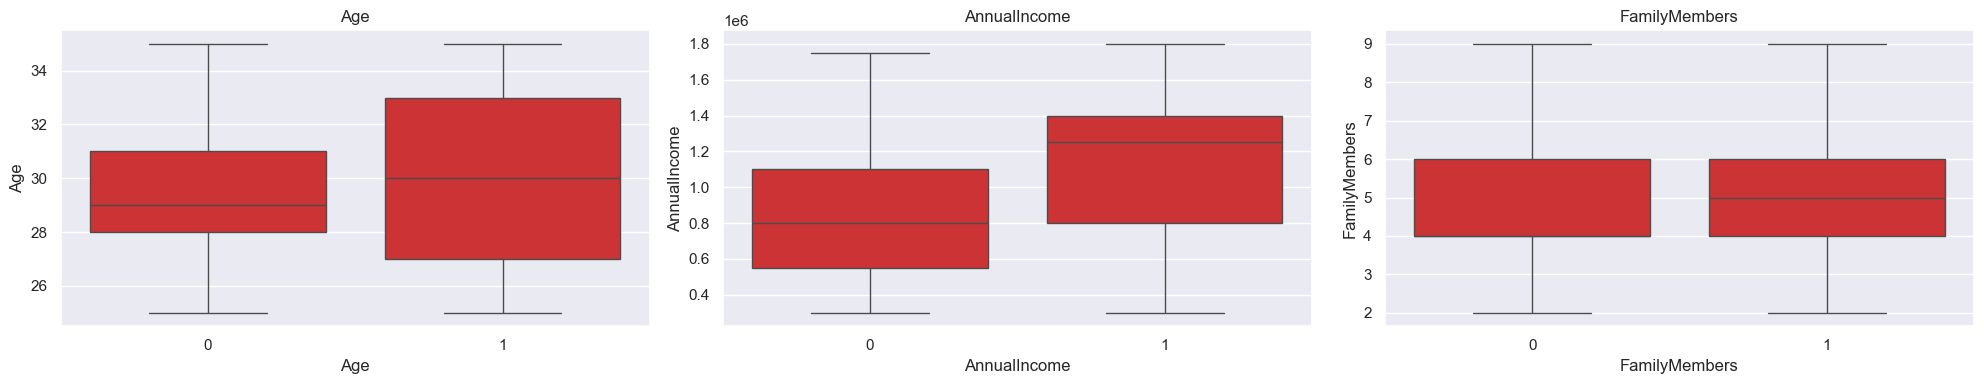

In [27]:
num_features = ['Age', 'AnnualIncome', 'FamilyMembers']
plt.figure(figsize=(20, 4))
plotnumber = 1

for feat in num_features:
    ax = plt.subplot(1, len(num_features), plotnumber)
    sns.boxplot(x='TravelInsurance', y=feat, data=df)
    plt.xlabel(feat)
    plt.title(feat)
    plotnumber += 1
    plt.tight_layout();

> Tidak ada outlier pada kolom numerik

## **3. Data Preparation**

### **Define Features (X) and Target (y)**

In [29]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

In [31]:
X.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No


In [32]:
X['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [33]:
X['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
X['ChronicDiseases'].unique()

array([1, 0], dtype=int64)

In [35]:
X['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
X['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
cat_cols = ['Employment Type', 'GraduateOrNot', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
X[cat_cols] = X[cat_cols].astype('category')

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   Employment Type      1987 non-null   category
 2   GraduateOrNot        1987 non-null   category
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   category
 5   ChronicDiseases      1987 non-null   category
 6   FrequentFlyer        1987 non-null   category
 7   EverTravelledAbroad  1987 non-null   category
dtypes: category(6), int64(2)
memory usage: 43.8 KB


### **Train-Test Splitting**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [42]:
X.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No


### **Pre-Processing (Scaling and Encoding)**
- Encoding
    + Onehot Encoding --> `Employment Type`, `ChronicDiseases`, `FrequentFlyer`, `EverTravelledAbroad`
    + Ordinal --> `GraduateOrNot`
- Scaling
    + Robust Scaler --> `AnnualIncome`

In [44]:
map_ordinal = [{'col' : 'GraduateOrNot', 'mapping': {'No': 0, 'Yes': 1}}]
pipe_prep = Pipeline([('onehot', OneHotEncoder(drop='first')),
                      ('ordindal', OrdinalEncoder(mapping=map_ordinal)),
                      ('rbst', RobustScaler())])

In [48]:
transformer = ColumnTransformer([('onehot', pipe_prep[0], ['Employment Type', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']),
                                 ('ordinal', pipe_prep[1], ['GraduateOrNot']),
                                 ('rbst', pipe_prep[2], ['AnnualIncome'])],
                                 remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Employment Type', 'ChronicDiseases',
                                  'FrequentFlyer', 'EverTravelledAbroad']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'GraduateOrNot',
                                                          'data_type': dtype('O'),
                                                          'mapping': No     0
Yes    1
dtype: int64}]),
                                 ['GraduateOrNot']),
                                ('rbst', RobustScaler(), ['AnnualIncome'])])

## **4. Cross Validation (Model Benchmark)**

In [49]:
# Base Learner
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# ensemble various
voting = VotingClassifier(estimators=[('logreg', logreg),
                                      ('knn', knn),
                                      ('dt', dt)]) 

stacking = StackingClassifier(estimators=[('logreg', logreg),
                                      ('knn', knn),
                                      ('dt', dt)])

# ensemble similar
bagging = BaggingClassifier(random_state=42, estimator=KNeighborsClassifier(), n_estimators=100)
rf = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gradboost = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False)

In [51]:
list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb]
list_all_score = []
list_mean_score = [] 
list_std = [] 

for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross val
    crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'f1')

    # F1 score
    list_all_score.append(crossval.round(2))
    list_mean_score.append(crossval.mean())
    list_std.append(crossval.std())

In [52]:
df_f1 = pd.DataFrame()
df_f1['algo'] = list_model
df_f1['all_score'] = list_all_score
df_f1['mean_score'] = list_mean_score
df_f1['std_score'] = list_std

df_f1

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=42),"[0.55, 0.63, 0.58, 0.64, 0.59]",0.600301,0.031319
1,KNeighborsClassifier(),"[0.63, 0.75, 0.66, 0.59, 0.66]",0.660449,0.051953
2,DecisionTreeClassifier(random_state=42),"[0.65, 0.73, 0.63, 0.64, 0.66]",0.663439,0.036351
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.66, 0.78, 0.68, 0.64, 0.69]",0.691111,0.049759
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.67, 0.78, 0.69, 0.63, 0.69]",0.694132,0.048854
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.68, 0.74, 0.67, 0.58, 0.69]",0.672304,0.051960
6,RandomForestClassifier(random_state=42),"[0.68, 0.72, 0.66, 0.66, 0.67]",0.680550,0.022436
7,AdaBoostClassifier(random_state=42),"[0.63, 0.72, 0.64, 0.66, 0.7]",0.669303,0.034187
8,GradientBoostingClassifier(random_state=42),"[0.71, 0.8, 0.73, 0.68, 0.73]",0.727697,0.039021
9,"XGBClassifier(base_score=None, booster=None, c...","[0.69, 0.75, 0.67, 0.66, 0.71]",0.696709,0.033638


## **5. Cross Validation + Resampling**

In [53]:
# Over Sampling
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb]
list_all_score = []
list_mean_score = []
list_std = []

for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote),
        ('modeling', model)
    ])

    # cross val
    crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'f1')

    # F1 score
    list_all_score.append(crossval.round(2))
    list_mean_score.append(crossval.mean())
    list_std.append(crossval.std())

In [55]:
df_f1_smote = pd.DataFrame()
df_f1_smote['algo'] = list_model
df_f1_smote['all_score'] = list_all_score
df_f1_smote['mean_score'] = list_mean_score
df_f1_smote['std_score'] = list_std

df_f1_smote

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=42),"[0.58, 0.64, 0.64, 0.64, 0.64]",0.628006,0.023185
1,KNeighborsClassifier(),"[0.62, 0.68, 0.62, 0.59, 0.65]",0.630994,0.030941
2,DecisionTreeClassifier(random_state=42),"[0.64, 0.7, 0.63, 0.65, 0.65]",0.656887,0.024654
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.64, 0.71, 0.67, 0.65, 0.68]",0.668880,0.025581
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.66, 0.7, 0.68, 0.64, 0.67]",0.669620,0.021732
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.63, 0.67, 0.62, 0.59, 0.66]",0.633669,0.029380
6,RandomForestClassifier(random_state=42),"[0.65, 0.72, 0.65, 0.66, 0.67]",0.670294,0.024150
7,AdaBoostClassifier(random_state=42),"[0.69, 0.74, 0.67, 0.63, 0.66]",0.679744,0.036883
8,GradientBoostingClassifier(random_state=42),"[0.71, 0.79, 0.73, 0.68, 0.73]",0.727993,0.038242
9,"XGBClassifier(base_score=None, booster=None, c...","[0.7, 0.75, 0.68, 0.66, 0.69]",0.694141,0.029078


> Keputusan: Pakai model GradietBoostingClassifier yang datanya telah di resampling dengan SMOTE

## **6. Hyperparameter Tuning**

In [62]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote),
        ('modeling', gradboost)
    ])

# hyperparam
hyperparam = {
    'modeling__n_estimators': [100, 200, 300],         
    'modeling__learning_rate': [0.01, 0.05, 0.1], 
    'modeling__max_depth': [3, 5, 7, 9, 11],                  
    'modeling__min_samples_split': [2, 5, 10],         
    'modeling__min_samples_leaf': [1, 2, 4]           
}

# grid search
gridsearch = GridSearchCV(
    estimator = pipe_prep_model,
    cv = 5,
    n_jobs = -1,
    param_grid = hyperparam,
    scoring = 'f1'
)

In [63]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Employment '
                                                                          'Type',
                                                                          'ChronicDiseases',
                                                                          'FrequentFlyer',
                                                                          'EverTravelledAbroad']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'GraduateOrNot',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': No     0
Yes    1
dtype: int64}]),
                                                                         ['Gr...
                                       ('resampling',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('modeling',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.05, 0.1],
                         'modeling__max_depth': [3, 5, 7, 9, 11],
                         'modeling__min_samples_leaf': [1, 2, 4],
                         'modeling__min_samples_split': [2, 5, 10],
                         'modeling__n_estimators': [100, 200, 300]},
             scoring='f1')

In [64]:
gridsearch.best_score_

0.7279927905216607

In [65]:
gridsearch.best_params_

{'modeling__learning_rate': 0.1,
 'modeling__max_depth': 3,
 'modeling__min_samples_leaf': 1,
 'modeling__min_samples_split': 2,
 'modeling__n_estimators': 100}

In [66]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Employment Type',
                                                   'ChronicDiseases',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'GraduateOrNot',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': No     0
Yes    1
dtype: int64}]),
                                                  ['GraduateOrNot']),
                                                 ('rbst', RobustScaler(),
                                                  ['AnnualIncome'])])),
                ('resampling',
                 SMOTE(random_state=42, sampling_strategy='minority')),
                ('modeling', GradientBoostingClassifier(random_state=42))])

## **7. Predict to Test Set**

### **Before Tuning**

In [67]:
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote),
        ('modeling', gradboost)
    ])

pipe_prep_model.fit(X_train, y_train)

y_pred_before = pipe_prep_model.predict(X_test)

f1_score(y_test, y_pred_before)

0.6869565217391305

In [69]:
print('GradientBoosting Before Tuning')
print(classification_report(y_test, y_pred_before))

GradientBoosting Before Tuning
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       256
           1       0.90      0.56      0.69       142

    accuracy                           0.82       398
   macro avg       0.85      0.76      0.78       398
weighted avg       0.83      0.82      0.81       398



### **After Tuning**

In [68]:
best_model = gridsearch.best_estimator_

best_model.fit(X_train, y_train)

y_pred_after = best_model.predict(X_test)

f1_score(y_test, y_pred_after)

0.6869565217391305

In [70]:
print('GradientBoosting After Tuning')
print(classification_report(y_test, y_pred_after))

GradientBoosting After Tuning
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       256
           1       0.90      0.56      0.69       142

    accuracy                           0.82       398
   macro avg       0.85      0.76      0.78       398
weighted avg       0.83      0.82      0.81       398



## **8. Threshold Probability Adjustment**

In [71]:
y_prediction_prob = best_model.predict_proba(X_test)[:,-1]

In [73]:
precision, recall, threshold = precision_recall_curve(y_test, y_prediction_prob)

In [74]:
df_prc = pd.DataFrame()
df_prc['precision'] = precision[0:(len(precision) - 1)]
df_prc['recall'] = recall[0:(len(recall) - 1)]
df_prc['threshold'] = threshold

df_prc

,precision,recall,threshold
0,0.356784,1.000000,0.023329
1,0.357683,1.000000,0.031733
2,0.359494,1.000000,0.033439
3,0.360406,1.000000,0.038943
4,0.361323,1.000000,0.039260
...,...,...,...
329,0.857143,0.042254,0.978188
330,0.833333,0.035211,0.978992
331,0.750000,0.021127,0.980186
332,1.000000,0.021127,0.985534


In [83]:
df_prc.iloc[[172]]

,precision,recall,threshold
172,0.522843,0.725352,0.299421


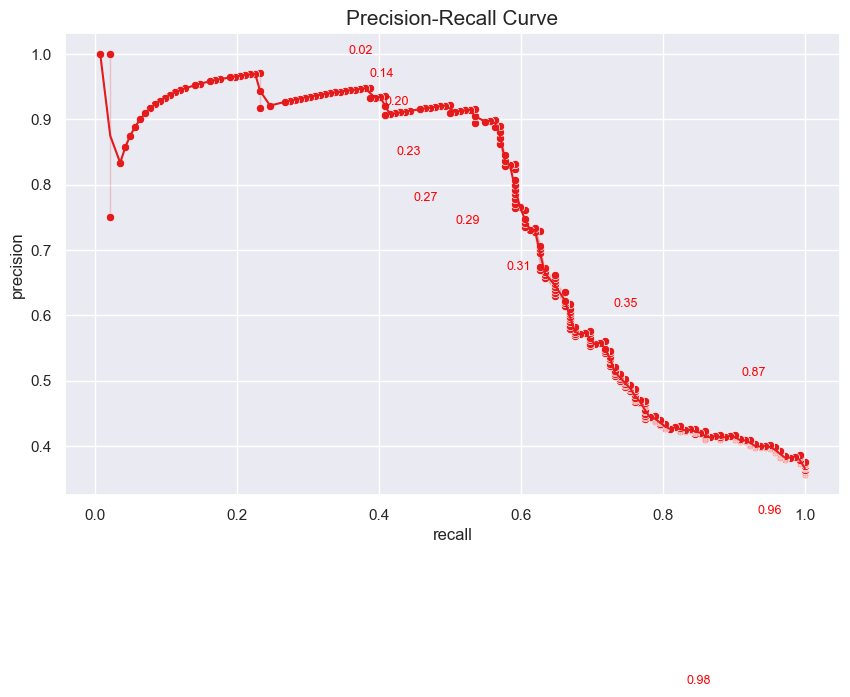

In [85]:
plt.figure(figsize=(10, 6))
plt.title('Precision-Recall Curve', fontsize=15);
sns.lineplot(data=df_prc, x='recall', y='precision');
sns.scatterplot(data=df_prc, x='recall', y='precision');
for i in range(0, len(threshold), len(threshold)//10):  # Plot threshold markers
    plt.text(precision[i], recall[i], f'{threshold[i]:.2f}', fontsize=9, color='red')

> Atur threshold di 0.299421

In [87]:
y_predict_newthreshold = (y_prediction_prob >= 0.299421).astype(int)
print(f'Recall Sebelumnya: {recall_score(y_test, y_pred_after)}')
print(f'Precision Sebelumnya: {precision_score(y_test, y_pred_after)}')
print(f'F1 Score Sebelumnya: {f1_score(y_test, y_pred_after)}')
print(f'Recall : {recall_score(y_test, y_predict_newthreshold)}')
print(f'Precision : {precision_score(y_test, y_predict_newthreshold)}')
print(f'F1 Score : {f1_score(y_test, y_predict_newthreshold)}')

Recall Sebelumnya: 0.5563380281690141
Precision Sebelumnya: 0.8977272727272727
F1 Score Sebelumnya: 0.6869565217391305
Recall : 0.7253521126760564
Precision : 0.5255102040816326
F1 Score : 0.6094674556213018


> Tidak Jadi Atur Threshold Probability

In [88]:
## ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_after)

## AUC
auc_score = roc_auc_score(y_test, y_pred_after)
auc_score

0.760590889084507

> Skor AUC (Area Under Curve) sebesar 0.76. Ini memberikan gambaran bahwa model telah cukup baik memprediksi namun diperlukan peningkatan performa lebih lanjut dengan feature selection.

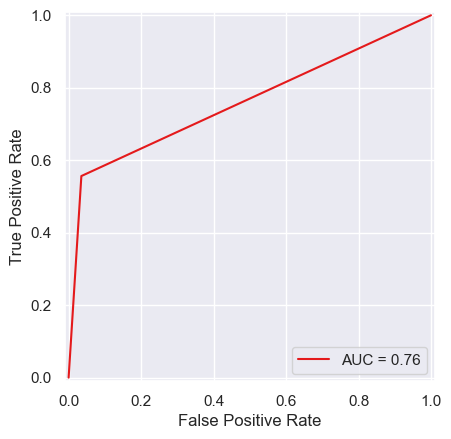

In [90]:
# ROC Curve
ROC_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
ROC_curve.plot();

## **9. Features Importance**

In [114]:
onehotcols = list(best_model['preprocessing'].transformers_[0][1].get_feature_names_out())
ordindalcols = list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out())
rbstcols = list(best_model['preprocessing'].transformers_[2][1].get_feature_names_out())
all_cols = onehotcols + ordindalcols + rbstcols + ['Age', 'FamilyMembers']

In [115]:
best_model['modeling'].feature_importances_

array([0.00896604, 0.01612368, 0.02634656, 0.01860056, 0.00590709,
       0.60718788, 0.17110506, 0.14576311])

In [116]:
feature_import = pd.DataFrame()
feature_import['Feature'] = all_cols
feature_import['Importance'] = best_model['modeling'].feature_importances_
feature_import = feature_import.sort_values(by='Importance', ascending=False)
feature_import = feature_import.reset_index(drop=True)
feature_import

,Feature,Importance
0,AnnualIncome,0.607188
1,Age,0.171105
2,FamilyMembers,0.145763
3,FrequentFlyer_Yes,0.026347
4,EverTravelledAbroad_Yes,0.018601
5,ChronicDiseases_1,0.016124
6,Employment Type_Private Sector/Self Employed,0.008966
7,GraduateOrNot,0.005907


> Semua fitur memiliki pengaruh penting. Tidak bisa dihilangkan.

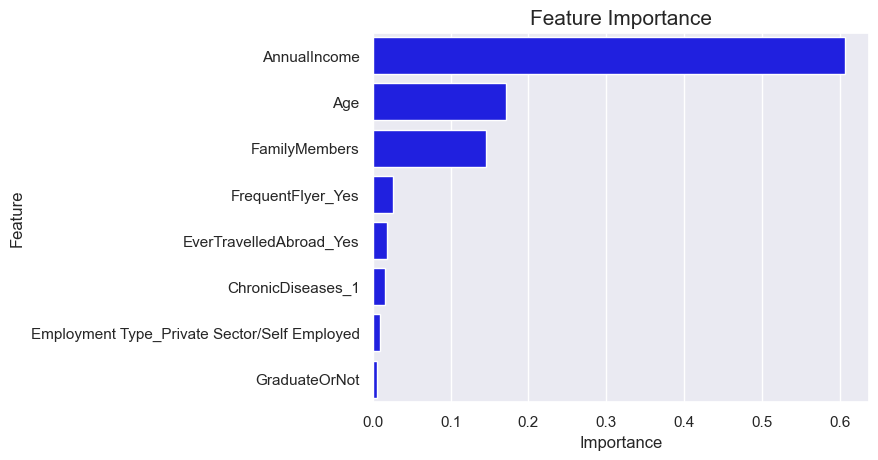

In [118]:
plt.title('Feature Importance', fontsize=15);
sns.barplot(data=feature_import, y='Feature', x='Importance', color='Blue');

## **10. Final Model and Saving Model**

In [120]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Employment Type',
                                                   'ChronicDiseases',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'GraduateOrNot',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': No     0
Yes    1
dtype: int64}]),
                                                  ['GraduateOrNot']),
                                                 ('rbst', RobustScaler(),
                                                  ['AnnualIncome'])])),
                ('resampling',
                 SMOTE(random_state=42, sampling_strategy='minority')),
                ('modeling', GradientBoostingClassifier(random_state=42))])

### **Pickle**

In [121]:
# best model
gradboost_tuning = gridsearch.best_estimator_

# fit
gradboost_tuning.fit(X, y)

# save with pickle
pickle.dump(gradboost_tuning, open('model_GradientBoosting_TravelInsurance.sav', 'wb'))

### **Joblib**

In [122]:
# best model
gradboost_tuning = gridsearch.best_estimator_

# fit
gradboost_tuning.fit(X, y)

# save model
joblib.dump(gradboost_tuning, 'model_GradientBoosting_TravelInsurance_joblib')

['model_GradientBoosting_TravelInsurance_joblib']

## **11. Model Interpretation**

In [128]:
# Start js (must have)
shap.initjs()

In [131]:
# ambil model dan data dari pipeline
my_model = gradboost_tuning[-1]
my_data = gradboost_tuning[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

In [132]:
# ambil nama feature
all_cols

['Employment Type_Private Sector/Self Employed',
 'ChronicDiseases_1',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_Yes',
 'GraduateOrNot',
 'AnnualIncome',
 'Age',
 'FamilyMembers']

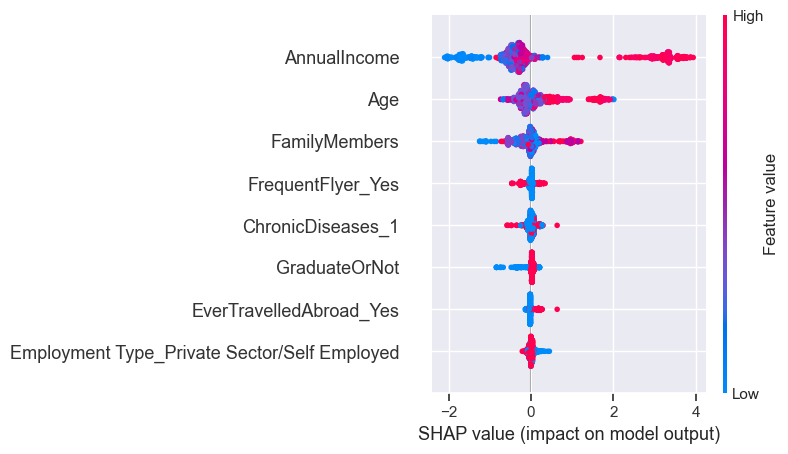

In [133]:
shap.summary_plot(shap_values, my_data, feature_names=all_cols)

### 🪄 **Model Interpretation Berdasarkan SHAP Analysis**
- `AnnualIncome`
    + Semakin tinggi AnnualIncome seseorang, maka semakin besar pengaruhnya dalam meningkatkan hasil prediksi postif yakni akan membeli produk asuransi perjalanan.
- `Age`
    + Semakin bertambahnya usia seseorang, maka akan cenderung membeli produk asuransi perjalanan.
- `FamilyMembers`
    + Pertambahan jumlah anggota keluarga maupun pengurangan jumlah kurang mendorong prediksi untuk cenderung membeli maupun tidak membeli (bersifat moderat).
- `FrequentFlyer_Yes`
    + Seseorang yang merupakan traveler (sering menggunakan layanan penerbangan) maka akan cenderung membeli produk asuransi perjalanan.
- `ChronicDiseases_1`
    + Seseorang yang memiliki penyakit kronis cenderung akan membeli produk asuransi perjalanan.
- `EverTravelledAbroad_Yes`
    + Seseorang yang pernah melakukan perjalanan ke luar negara sedikit memberikan pengaruh terhadap kecenderungan untuk membeli produk asuransi perjalanan.
- `Employment Type_Private Sector/Self Employed`
    + Seseorang yang bekerja di private sector cenderung akan memberikan pengaruh sedikit untuk tidak membeli produk asuransi perjalanan.

## **12. Summary**

### ✈️ **Summary**
Model --> Gradient Boosting Classifier
Spesifikasi Model
- learning_rate = 0.1
- max_depth = 3
- min_samples_leaf = 1
- min_samples_split = 2
- n_estimators: 100

   - Train Set F1 Score:
      - Before tuning: 0.73
      - After tuning: 0.73

   - Test Set F1 Score:
      - Before tuning: 0.67
      - After tuning: 0.67

---

Hyperparameter tuning tidak meningkatkan dan tidak menurunkan F1 score pada test set dengan model GradientBoostingClassifier. Namun, dapat diperoleh spesifikasi model yang jelas dan lebih efisien dengan menggunakan model hasil hyperparameter tuning.

Performa model GradientBoostingClassifier setelah tuning sebesar 0.67, dimana angka tersebut menunjukkan bahwa model masih belum cukup bagus untuk memprediksi seseorang yang akan membeli produk asuransi (kelas: 1)

Metric F1 Score digunakan karena cost function dari False Negative dianggap sama besar dengan cost False Positif, sehingga jumlah FN maupun FP harus balance dan sama-sama rendah. 


In [134]:
cm = confusion_matrix(y_test, y_pred_after)
cm

array([[247,   9],
       [ 63,  79]], dtype=int64)

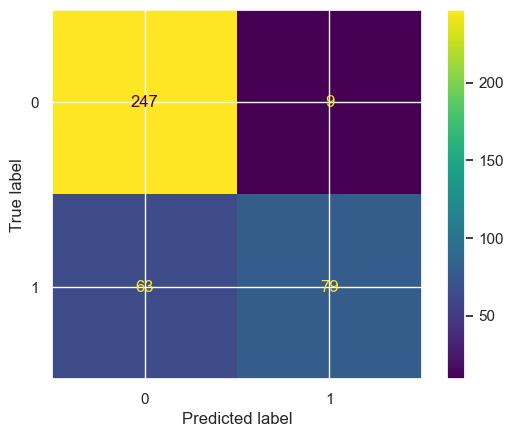

In [136]:
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot();

In [137]:
y_test.value_counts()

TravelInsurance
0    256
1    142
Name: count, dtype: int64

### 📝 **Perhitungan Kerugian Perusahaan**

Berdasarkan confusion matrix, dapat dihitung kerugian perusahaan jika seseorang tidak membeli produk asuransi yang ditawarkan.

**Sebelum Implementasi Model ML Gradient Boosting Classifier:**

= Jumlah Tidak Beli * Harga Asuransi

= 256 * 100000

= 25.6 Juta

**Setelah Implementasi Model ML Decision Tree:**

= (FP * Harga Asuransi) + (FN * Harga Iklan)

= (9 * 100000) + (63 * 100000)

= 900000 + 6300000

= 7.2 Juta

**Perusahaan bisa menekan kerugian yang dialami setelah implementasi model ML sebesar 18.4 Juta**